# Exploring data from beer reviews: BeerAdvocate dataset

In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

The data should be downloaded, extracted and placed inside the `data/` folder. 

In [7]:
extracted_path_ba = 'data/BeerAdvocate'

### What's behind the data?

#### 1. Beers

Columns that this dataset contains which we will consider are:

* `beer_id` - ID which represents a unique beer identifier
* `beer_name` - name of a beer
* `brewery_id` - ID of the brewery which produces it
* `brewery_name` - name of the brewery which produces it
* `style` - beer style
* `nbr_ratings` - number of ratings for that beer
* `nbr_reviews` - number of reviews for that beer
* `avg` - average score of the beer

some other features included:

* `ba_score` - score 
* `bros_score` - score 
* `abv` - alcohol by volume percentage?
* `avg_computed` - average score computed with aggregation
* `zscore` - score 
* `nbr_matched_valid_ratings` - score 
* `avg_matched_valid_ratings` - score 


In [11]:
beers_advocate = pd.read_csv(extracted_path_ba+"/beers.csv")
beers_advocate.sample(5)

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
74439,139897,Medusa (Brew Lab),34456,Creature Comforts,American Double / Imperial IPA,1,0,4.00,NaN,NaN,8.1,4.000000,NaN,0,NaN
265334,169717,Gruut Ale,15237,De Struise Brouwers,Scottish Gruit / Ancient Herbed Ale,4,0,3.25,NaN,NaN,6.0,3.255000,NaN,0,NaN
101940,32413,The Angel's Share - Bourbon Barrel-Aged,18149,The Lost Abbey,American Strong Ale,1891,700,4.24,94.0,NaN,12.5,4.284733,NaN,0,NaN
247696,256963,Imperial Peach Saison,35547,B-52 Brewing Co.,Saison / Farmhouse Ale,5,0,3.97,NaN,NaN,7.4,3.972000,NaN,0,NaN
13577,198929,Coastal Lager,43005,Spindrift Brewing Co.,American Pale Lager,10,3,3.85,84.0,NaN,5.0,3.844000,-0.284553,3,3.853333


Now we will look into the information about the breweries where the beers were produced, since that is where we find information about the location of beers. 

#### 2. Breweries

* `id` - unique identifier of a brewery
* `location` - location - country (and state in case of U.S.) of the brewery
* `name` - name of a brewery
* `nbr_beers` - number of beers it produces

In [14]:
# Information about breweries - name is linked to the location, which we need!
breweries_advocate = pd.read_csv(extracted_path_ba+"/breweries.csv")
breweries_advocate.head()

,id,location,name,nbr_beers
0,39912,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5
1,39913,Kyrgyzstan,Arpa (АРПА),1
2,39914,Kyrgyzstan,Bear Beer,4
3,39915,Kyrgyzstan,Blonder Pub,4
4,39916,Kyrgyzstan,Kellers Bier,2


**How many beers do we have that come from the US?**  

To find out, first we have to merge the data with the information about beer with the one of breweries.  

*Important to note:* Although in our analysis we will include all the beers (from the whole world) consumed/reviewed in the U.S., here we want to check the number of beers from the U.S. to determine if we have a sufficient amount of data concerning the US overall, i.e. knowing the subset of U.S. origin beers will give us insight into the dataset's adequacy for a U.S.-focused analysis.

In [13]:
beer_with_location = pd.merge(beers_advocate, breweries_advocate, left_on='brewery_id', right_on='id')

us_beers = beer_with_location[beer_with_location['location'].str.startswith('United States')]
print(f"Number of beers from the US: {len(us_beers)}")


Number of beers from the US: 204752


**From which states do they come from? What is the political affiliation of these states?**

In order to combine this with the political information about the states, we will load the political dataset `party_winners.csv` which contains states and the winning party over the span of election years from 2004-2016. The states that had a change of a winning party are marked as *swing states*.

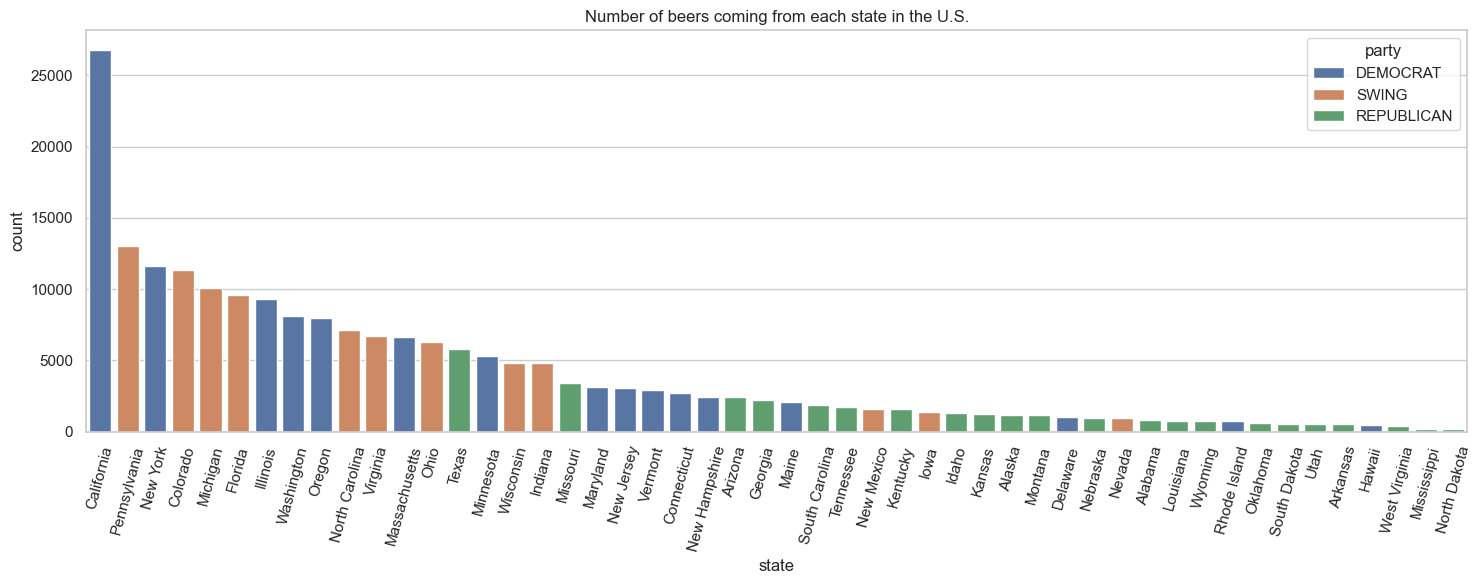

In [17]:
# And from which states? How many?
party_winners_path = 'data/generated/party_winners.csv'
party_winners = pd.read_csv(party_winners_path)

us_states = us_beers['location'].str.split(', ').str[-1].value_counts()
us_states_for_plotting = pd.merge(us_states, party_winners, left_on='location', right_on='state')
us_states_for_plotting = us_states_for_plotting[['count', 'state', 'party']]

# Histogram showing the number of states
plt.figure(figsize=(15, 6))
sns.set(style="whitegrid")
sns.barplot(data=us_states_for_plotting, x='state', y='count', hue='party')
plt.title('Number of beers coming from each state in the U.S.')
plt.xticks(rotation=75)
plt.tight_layout()

Now, let's check how many users come from the U.S. based on the provided location!

#### 3. Users

* `user_id` - the unique ID of a user on the platform 
* `user_name` - username of the user
* `nbr_ratings` - number of submitted ratings
* `nbr_reviews` - number of written reviews
* `joined` - the exact time of joining the platform
* `location` - location of the user

In [21]:
users_beer_advocate = pd.read_csv(extracted_path_ba+"/users.csv")
users_beer_advocate['joined'] = pd.to_datetime(users_beer_advocate['joined'], unit='ms')
#users_beer_advocate.head(10)
print("We have information about", len(users_beer_advocate), "users")

We have information about 153704 users


How many users do come from US?

In [22]:
# Some locations are NaN - we get rid of them
users_beer_advocate.location.isna().sum()
users_beer_advocate.dropna(subset=['location'], inplace=True)

# Check how many of them come from the US
us_users = users_beer_advocate[users_beer_advocate['location'].str.startswith('United States')]
print(f"Number of users from the US: {len(us_users)}")

Number of users from the US: 113223


Now, let's what are the states that have the most reviewers, combined with the information of their political affiliation?

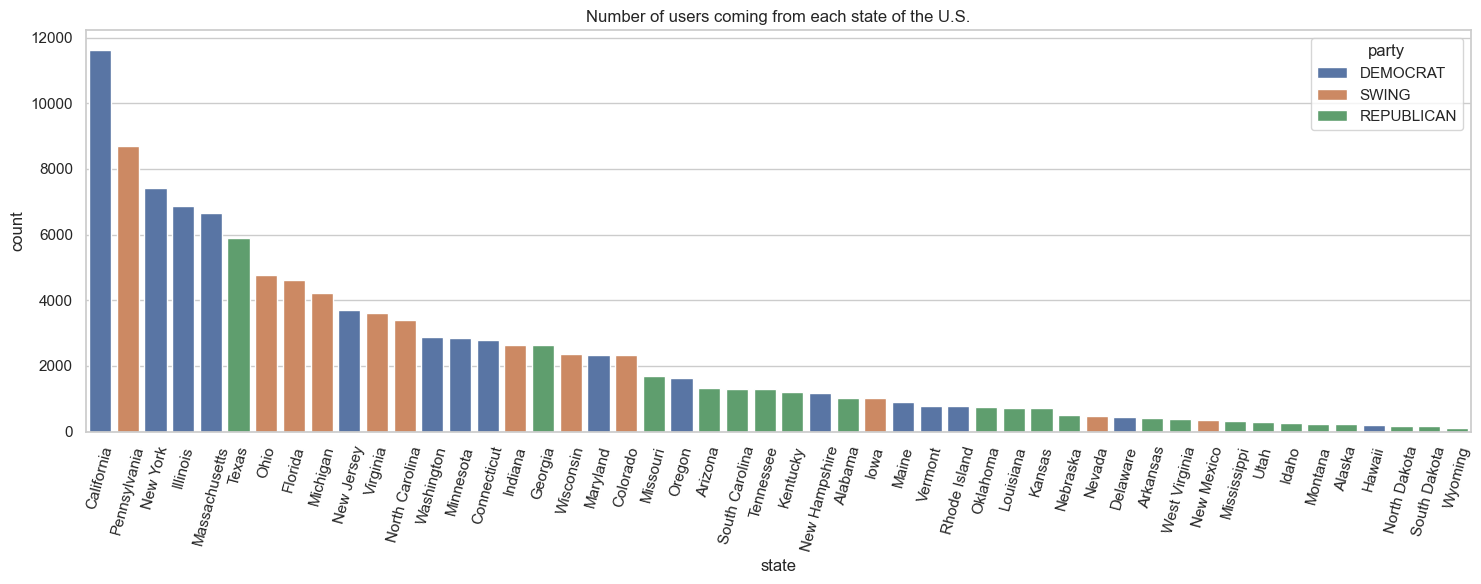

In [24]:
# And from which states? How many?

us_states = us_users['location'].str.split(', ').str[-1].value_counts()
users_states_for_plotting = pd.merge(us_states, party_winners, left_on='location', right_on='state')
users_states_for_plotting = users_states_for_plotting[['count', 'state', 'party']]

# Histogram showing the number of states
plt.figure(figsize=(15, 6))
sns.set(style="whitegrid")
sns.barplot(data=users_states_for_plotting, x='state', y='count', hue='party')
plt.title("Number of users coming from each state of the U.S.")
plt.xticks(rotation=75)
plt.tight_layout()

#### 4. Reviews

Now, let's take a look into our review data. First of all, we have to unpack it and parse it to convert it into a convenient form.

In [25]:
!gzip -dc data/BeerAdvocate/reviews.txt.gz > data/BeerAdvocate/reviewes_beer_adv.txt

In [26]:
# We need to parse manually data to put it into pandas dataframe
data = []

# Read the entire file as a string
with open('data/BeerAdvocate/reviewes_beer_adv.txt', 'r') as file:
    content = file.read()

# Split the content by double newlines to get individual rows
rows = content.strip().split('\n\n')

In [27]:
# How many reviews do we have in total?
len(rows)

2589586

In [30]:
# Create dictionary out of this reviews that will be turned into pandas DF
beer_name = []
beer_id = []
brewery_name = []
brewery_id = []
style = []
abv = []
date = []
user_name = []
user_id = []
appearance = []
aroma = []
palate = []
taste = []
overall = []
rating = []
text = []

# Function to parse review according to format
def parse_review(rows, beer_name, beer_id, brewery_name, brewery_id, style, abv, date, user_name, user_id, appearance, aroma, palate, taste, overall, rating, text):

    i = 0
    for row in rows:
        #print(i)
        i = i + 1
        review = row.split('\n')
        #print(review)
        for element in review:
            # Append beer name
            if element.startswith('beer_name'):
                beer_name.append(element.split(': ')[1])
            # Append beer_id
            elif element.startswith('beer_id'):
                beer_id.append(element.split(': ')[1])
            # Append brewery_name
            elif element.startswith('brewery_name'):
                brewery_name.append(element.split(': ')[1])
            # Append brewery_id
            elif element.startswith('brewery_id'):
                brewery_id.append(element.split(': ')[1])
            # Append style
            elif element.startswith('style'):
                style.append(element.split(': ')[1])
            # Append abv
            elif element.startswith('abv'):
                abv.append(element.split(': ')[1])
            # Append date
            elif element.startswith('date'):
                date.append(element.split(': ')[1])
            # Append user_name
            elif element.startswith('user_name'):
                user_name.append(element.split(': ')[1])
            # Append user_id
            elif element.startswith('user_id'):
                user_id.append(element.split(': ')[1])
            # Append appearance
            elif element.startswith('appearance'):
                appearance.append(element.split(': ')[1])
            # Append aroma
            elif element.startswith('aroma'):
                aroma.append(element.split(': ')[1])
            # Append palate
            elif element.startswith('palate'):
                palate.append(element.split(': ')[1])
            # Append taste
            elif element.startswith('taste'):
                taste.append(element.split(': ')[1])
            # Append overall
            elif element.startswith('overall'):
                overall.append(element.split(': ')[1])
            # Append rating
            elif element.startswith('rating'):
                rating.append(element.split(': ')[1])
            # Append text
            elif element.startswith('text'):
                text.append(element.split(': ')[1])

    dictionary = {'beer_name' : beer_name,
            'beer_id' : beer_id,
            'brewery_name': brewery_name,
            'brewery_id': brewery_id,
            'style': style,
            'abv' : abv,
            'date': date,
            'user_name' : user_name,
            'user_id' : user_id,
            'appearance' : appearance,
            'aroma' : aroma,
            'palate' : palate,
            'taste' : taste,
            'overall' : overall,
            'rating' : rating,
            'text' : text}


    return dictionary

In [31]:
dictionary = parse_review(rows, beer_name, beer_id, brewery_name, brewery_id, style, abv, date, user_name, user_id, appearance, aroma, palate, taste, overall, rating, text)

In [32]:
review_df = pd.DataFrame(dictionary)

In [33]:
review_df.head(5)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text
0,Régab,142544,Societe des Brasseries du Gabon (SOBRAGA),37262,Euro Pale Lager,4.5,1440064800,nmann08,nmann08.184925,3.25,2.75,3.25,2.75,3.0,2.88,"From a bottle, pours a piss yellow color with ..."
1,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1235127600,StJamesGate,stjamesgate.163714,3.0,3.5,3.5,4.0,3.5,3.67,Pours pale copper with a thin head that quickl...
2,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1142247600,mdagnew,mdagnew.19527,4.0,3.5,3.5,4.0,3.5,3.73,"500ml Bottle bought from The Vintage, Antrim....."
3,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1101898800,helloloser12345,helloloser12345.10867,4.0,3.5,4.0,4.0,4.5,3.98,Serving
4,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1093860000,cypressbob,cypressbob.3708,4.0,4.0,4.0,4.0,4.0,4.00,"500ml bottlePours with a light, slightly hazy ..."


We notice that the date should be converted into a readable format.

In [34]:
column = pd.to_datetime(review_df['date'], unit='s').dt.date
review_df['readable_date'] = column
review_df.head(5)

/var/folders/10/5vz3cb892wl_tn604wbmcvf00000gn/T/ipykernel_48550/3811854579.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  column = pd.to_datetime(review_df['date'], unit='s').dt.date


,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,readable_date
0,Régab,142544,Societe des Brasseries du Gabon (SOBRAGA),37262,Euro Pale Lager,4.5,1440064800,nmann08,nmann08.184925,3.25,2.75,3.25,2.75,3.0,2.88,"From a bottle, pours a piss yellow color with ...",2015-08-20
1,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1235127600,StJamesGate,stjamesgate.163714,3.0,3.5,3.5,4.0,3.5,3.67,Pours pale copper with a thin head that quickl...,2009-02-20
2,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1142247600,mdagnew,mdagnew.19527,4.0,3.5,3.5,4.0,3.5,3.73,"500ml Bottle bought from The Vintage, Antrim.....",2006-03-13
3,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1101898800,helloloser12345,helloloser12345.10867,4.0,3.5,4.0,4.0,4.5,3.98,Serving,2004-12-01
4,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1093860000,cypressbob,cypressbob.3708,4.0,4.0,4.0,4.0,4.0,4.00,"500ml bottlePours with a light, slightly hazy ...",2004-08-30


#### Reviews from 2004

In [35]:
# Filter out first all the reviews that are in year 2004 - our first election year
reviews_2004 = review_df[pd.to_datetime(review_df['readable_date']).dt.year == 2004]
length_2004 = len(reviews_2004)
print(f"Number of reviews that is from 2004: {length_2004}")

# Let's see how many different beers are reviewed
unique_beers_2004 = reviews_2004[['beer_name', 'beer_id']].value_counts()
print(f"Number of unique beers reviewed in 2004: {len(unique_beers_2004)}")

Number of reviews that is from 2004: 62994
Number of unique beers reviewed in 2004: 10450


In [37]:
# Merging reviews with breweries (to get location of brewerie)
reviews_2004.loc[:, 'brewery_id'] = reviews_2004['brewery_id'].astype('int64')
rb_2004 = pd.merge(reviews_2004, breweries_advocate, left_on='brewery_id', right_on='id')

# Merging reviews with user countries (to get where reviewer comes from)
rbr_2004 = pd.merge(rb_2004, users_beer_advocate, left_on='user_id', right_on='user_id')

# Location of brewery has name location_x, while location of user has name location_y so we rename them
# Additionally, drop user_name_y
rbr_2004.rename(columns={'location_x': 'brewery_location', 'location_y': 'user_location', 'user_name_x' : 'user_name'}, inplace=True)
rbr_2004.drop('user_name_y', axis=1, inplace=True)

Let's see what do we have in the table

In [38]:
rbr_2004.head()

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,...,text,readable_date,id,brewery_location,name,nbr_beers,nbr_ratings,nbr_reviews,joined,user_location
0,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1101898800,helloloser12345,helloloser12345.10867,4.0,...,Serving,2004-12-01,10093,Northern Ireland,Strangford Lough Brewing Company Ltd,5,31,31,1970-01-13 17:56:20.400,Northern Ireland
1,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1093860000,cypressbob,cypressbob.3708,4.0,...,"500ml bottlePours with a light, slightly hazy ...",2004-08-30,10093,Northern Ireland,Strangford Lough Brewing Company Ltd,5,604,604,1970-01-13 09:02:06.000,Northern Ireland
2,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,1100775600,francisweizen,francisweizen.964,4.0,...,"Cloudy, dark golden, with some little floaties...",2004-11-18,10093,Northern Ireland,Strangford Lough Brewing Company Ltd,5,1922,1790,1970-01-12 23:53:27.600,"United States, Alaska"
3,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,1094983200,cypressbob,cypressbob.3708,4.5,...,"500ml bottlePours with a cloudy light amber, g...",2004-09-12,10093,Northern Ireland,Strangford Lough Brewing Company Ltd,5,604,604,1970-01-13 09:02:06.000,Northern Ireland
4,Caffrey's Irish Ale,825,Thomas Caffrey Brewing Co.,297,Irish Red Ale,3.8,1091354400,Gusler,gusler.811,3.0,...,The beer as its spills from the can a slightly...,2004-08-01,297,Northern Ireland,Thomas Caffrey Brewing Co.,2,2267,2267,1970-01-12 23:01:33.600,"United States, Arizona"


In [39]:
# Now we are going to see how many beers are reviewed in 2004 that come from US
us_beers_2004 = rbr_2004[rbr_2004['brewery_location'].str.startswith('United States')]
print(f"Number of beers from the US: {len(us_beers_2004)}")

Number of beers from the US: 39857


#### Repeting the same for other election years: 2008, 2012, 2016

In [40]:
# Filter out all the reviews that are in year 2008 
reviews_2008 = review_df[pd.to_datetime(review_df['readable_date']).dt.year == 2008]
length_2008 = len(reviews_2008)
print(f"Number of reviews that is from 2008: {length_2008}")

# Let's see how many different beers are reviewed
unique_beers_2008 = reviews_2008[['beer_name', 'beer_id']].value_counts()
print(f"Number of unique beers reviewed in 2008: {len(unique_beers_2008)}")

# Merging reviews with breweries (to get location of the beer/brewerie)
reviews_2008.loc[:, 'brewery_id'] = reviews_2008['brewery_id'].astype('int64')
rb_2008 = pd.merge(reviews_2008, breweries_advocate, left_on='brewery_id', right_on='id')

# Merging reviews with user countries (to get where reviewer comes from)
rbr_2008 = pd.merge(rb_2008, users_beer_advocate, left_on='user_id', right_on='user_id')

# Location of brewery has name location_x, while location of user has name location_y so we rename them
# Additionally, drop user_name_y
rbr_2008.rename(columns={'location_x': 'brewery_location', 'location_y': 'user_location', 'user_name_x' : 'user_name'}, inplace=True)
rbr_2008.drop('user_name_y', axis=1, inplace=True)

# Now we are going to see how many beers are reviewed in 2004 that come from US
us_beers_2008 = rbr_2008[rbr_2008['brewery_location'].str.startswith('United States')]
print(f"Number of beers from the US: {len(us_beers_2008)}")


Number of reviews that is from 2008: 194847
Number of unique beers reviewed in 2008: 17832
Number of beers from the US: 139422


In [41]:
# Filter out all the reviews that are in year 2012
reviews_2012 = review_df[pd.to_datetime(review_df['readable_date']).dt.year == 2012]
length_2012 = len(reviews_2012)
print(f"Number of reviews that is from 2012: {length_2012}")

# Let's see how many different beers are reviewed
unique_beers_2012 = reviews_2012[['beer_name', 'beer_id']].value_counts()
print(f"Number of unique beers reviewed in 2012: {len(unique_beers_2012)}")

# Merging reviews with breweries (to get location of the beer/brewery)
reviews_2012.loc[:, 'brewery_id'] = reviews_2012['brewery_id'].astype('int64')
rb_2012 = pd.merge(reviews_2012, breweries_advocate, left_on='brewery_id', right_on='id')

# Merging reviews with user countries (to get where reviewer comes from)
rbr_2012 = pd.merge(rb_2012, users_beer_advocate, left_on='user_id', right_on='user_id')

# Location of brewery has name location_x, while location of user has name location_y so we rename them
# Additionally, drop user_name_y
rbr_2012.rename(columns={'location_x': 'brewery_location', 'location_y': 'user_location', 'user_name_x' : 'user_name'}, inplace=True)
rbr_2012.drop('user_name_y', axis=1, inplace=True)

# Now we are going to see how many beers are reviewed in 2012 that come from the US
us_beers_2012 = rbr_2012[rbr_2012['brewery_location'].str.startswith('United States')]
print(f"Number of beers from the US in 2012: {len(us_beers_2012)}")


Number of reviews that is from 2012: 230562
Number of unique beers reviewed in 2012: 29070
Number of beers from the US in 2012: 166692


In [42]:
# Filter out all the reviews that are in year 2016
reviews_2016 = review_df[pd.to_datetime(review_df['readable_date']).dt.year == 2016]
length_2016 = len(reviews_2016)
print(f"Number of reviews that is from 2016: {length_2016}")

# Let's see how many different beers are reviewed
unique_beers_2016 = reviews_2016[['beer_name', 'beer_id']].value_counts()
print(f"Number of unique beers reviewed in 2016: {len(unique_beers_2016)}")

# Merging reviews with breweries (to get location of the beer/brewery)
reviews_2016.loc[:, 'brewery_id'] = reviews_2016['brewery_id'].astype('int64')
rb_2016 = pd.merge(reviews_2016, breweries_advocate, left_on='brewery_id', right_on='id')

# Merging reviews with user countries (to get where reviewer comes from)
rbr_2016 = pd.merge(rb_2016, users_beer_advocate, left_on='user_id', right_on='user_id')

# Location of brewery has name location_x, while location of user has name location_y so we rename them
# Additionally, drop user_name_y
rbr_2016.rename(columns={'location_x': 'brewery_location', 'location_y': 'user_location', 'user_name_x' : 'user_name'}, inplace=True)
rbr_2016.drop('user_name_y', axis=1, inplace=True)

# Now we are going to see how many beers are reviewed in 2016 that come from the US
us_beers_2016 = rbr_2016[rbr_2016['brewery_location'].str.startswith('United States')]
print(f"Number of beers from the US in 2016: {len(us_beers_2016)}")

Number of reviews that is from 2016: 193895
Number of unique beers reviewed in 2016: 48541
Number of beers from the US in 2016: 155355


Let's make a nice visualization to compare the numbers...

Text(0, 0.5, 'Number of US Beers')

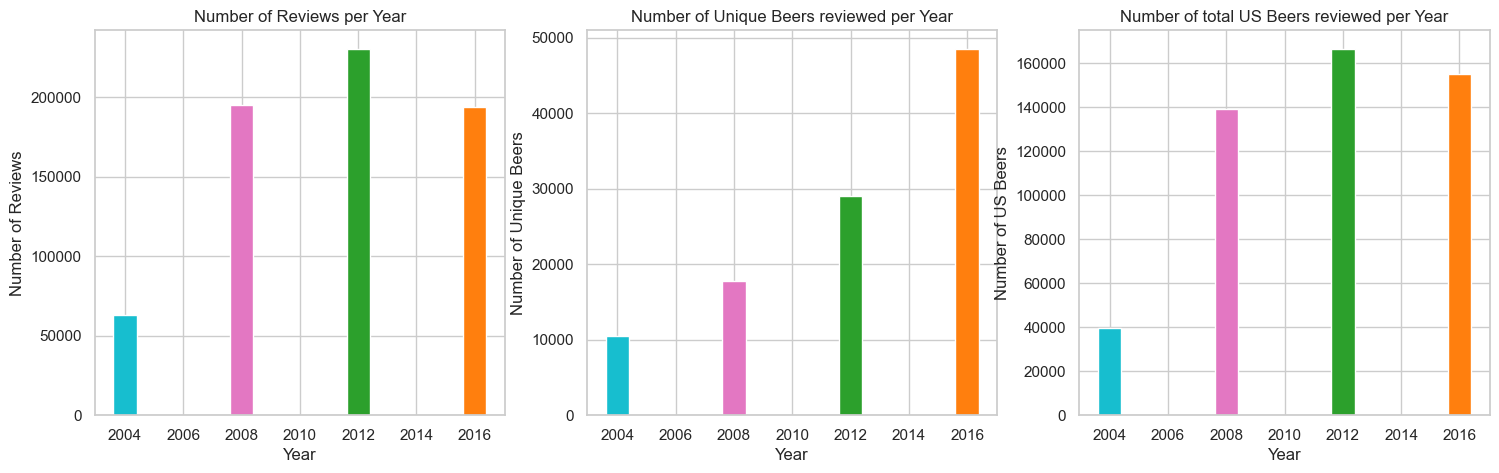

In [51]:
years = [2004, 2008, 2012, 2016]
num_reviews = [length_2004, length_2008, length_2012, length_2016]
num_unique_beers = [len(unique_beers_2004), len(unique_beers_2008), len(unique_beers_2012), len(unique_beers_2016)]
num_us_beers = [len(us_beers_2004), len(us_beers_2008), len(us_beers_2012), len(us_beers_2016)]
colors = ['tab:cyan', 'tab:pink', 'tab:green', 'tab:orange']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Number of reviews per year
axes[0].bar(years, num_reviews, color=colors)
axes[0].set_title('Number of Reviews per Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Reviews')

# Plot 2: Number of unique beers per year
axes[1].bar(years, num_unique_beers, color=colors)
axes[1].set_title('Number of Unique Beers reviewed per Year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Unique Beers')

# Plot 3: Number of US beers per year
axes[2].bar(years, num_us_beers, color=colors)
axes[2].set_title('Number of total US Beers reviewed per Year')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Number of US Beers')


#### Combining with political data: How many breweries come from each state and what party was a winner that year?

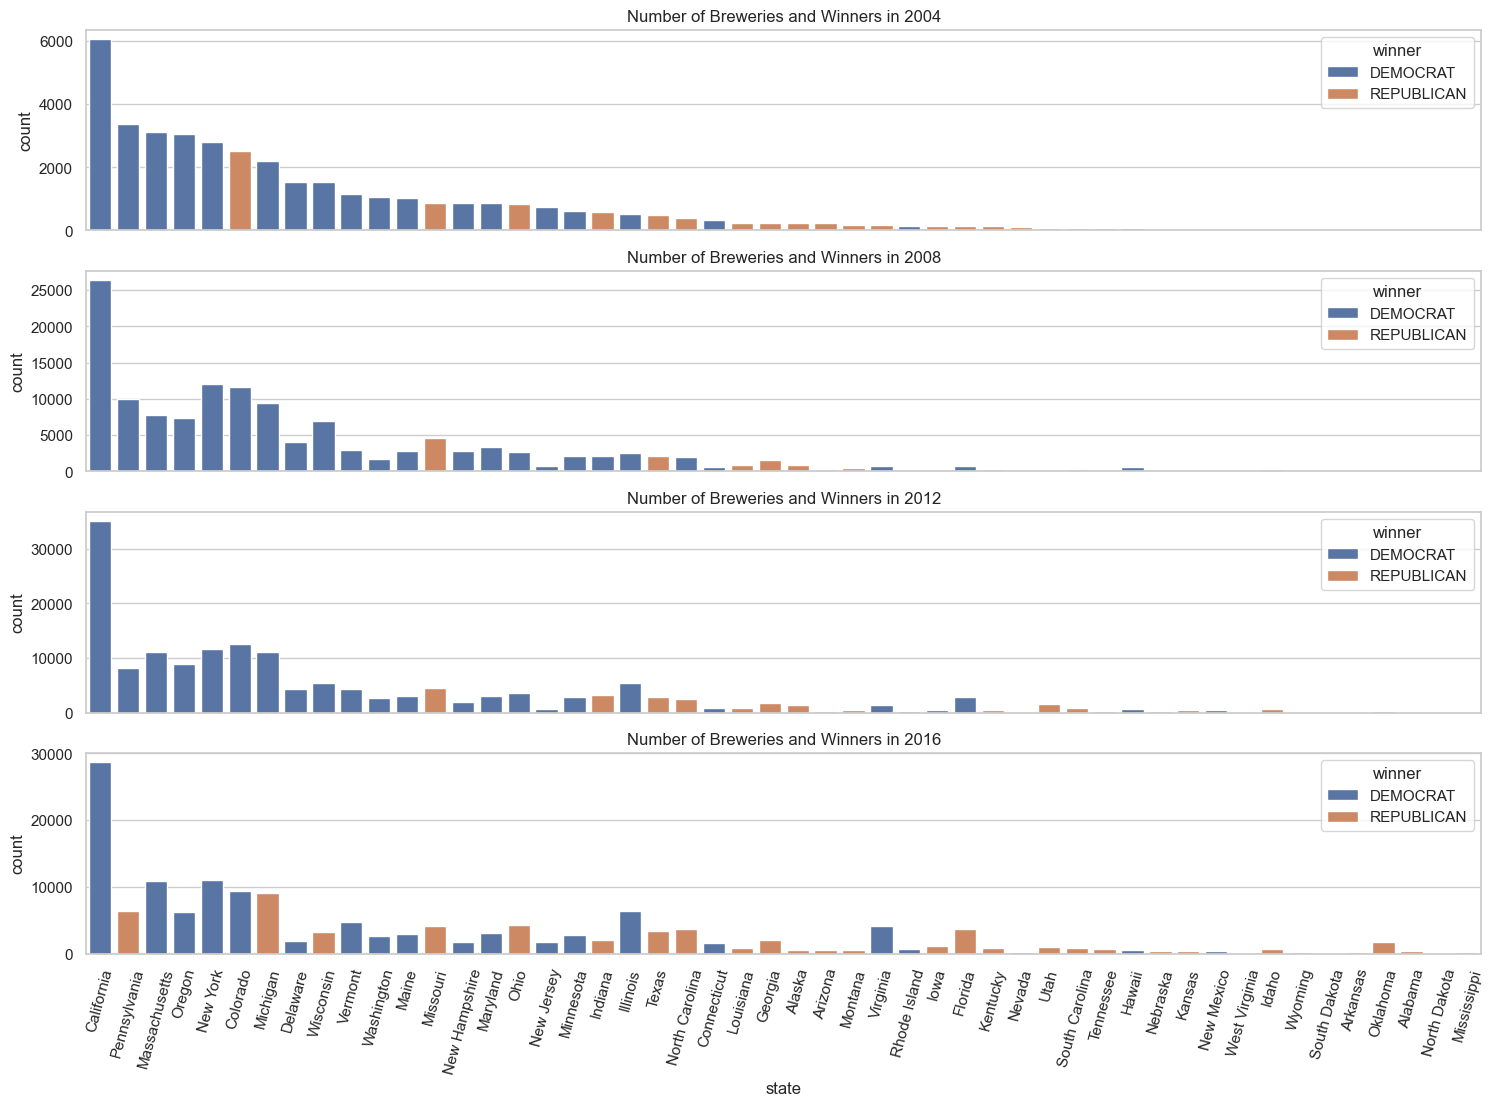

In [56]:
winners_over_years = "data/generated/party_winners_over_years.csv"
winners_over_years = pd.read_csv(winners_over_years)

fig, axes = plt.subplots(4, 1, figsize=(18, 12), sharex=True)
axes = axes.flatten() 

yearly_data = {
    2004: rbr_2004,
    2008: rbr_2008,
    2012: rbr_2012,
    2016: rbr_2016
}

# Loop through each year and create a plot
for i, year in enumerate(years):
    # Filter winners and breweries data for the current year
    winners_year = winners_over_years[winners_over_years['year'] == year][['state', 'year', 'winner']]
    winners_year.loc[:, 'state'] = winners_year['state'].str.title()

    rbr = yearly_data[year]
    # Extract all US breweries for the year
    us_breweries_year = rbr[rbr['brewery_location'].str.startswith('United States')]
    us_breweries_year = us_breweries_year['brewery_location'].str.split(', ').str[-1].value_counts().reset_index()
    us_breweries_year.columns = ['state', 'count']

    # Merge with winners data for the current year
    us_br_wi_year = pd.merge(us_breweries_year, winners_year, left_on='state', right_on='state')

    # Plot the data on the current subplot
    sns.barplot(data=us_br_wi_year, x='state', y='count', hue='winner', ax=axes[i])
    axes[i].set_title(f'Number of Breweries and Winners in {year}')
    axes[i].tick_params(axis='x', rotation=75)


#### Where do the reviewers come from, in each year and what was the winning party?

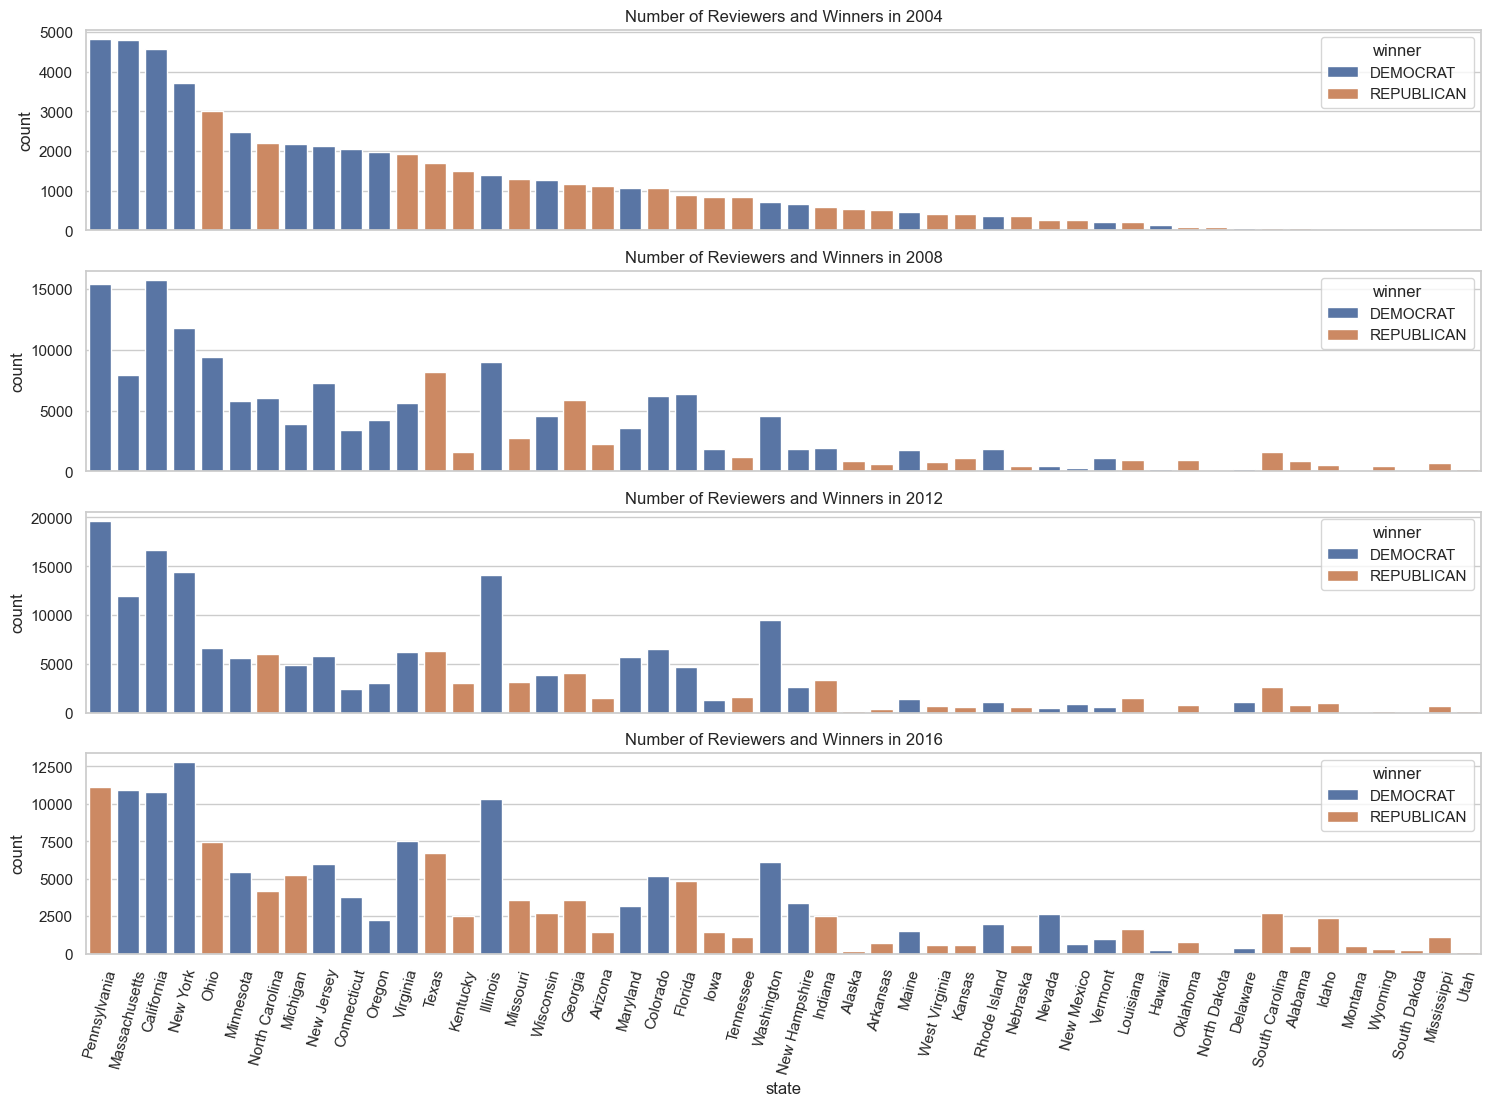

In [57]:
fig, axes = plt.subplots(4, 1, figsize=(18, 12), sharex=True)
axes = axes.flatten()  # Flatten to easily access by index

# Loop through each year and create a plot
for i, year in enumerate(years):
    # Access the pre-filtered data for the current year
    rbr_year = yearly_data[year]
    
    # Filter winners data for the current year
    winners_year = winners_over_years[winners_over_years['year'] == year][['state', 'year', 'winner']]
    winners_year.loc[:, 'state'] = winners_year['state'].str.title()

    # Extract all US reviewers for the year from the specific `rbr_year` data frame
    us_reviewers_year = rbr_year[rbr_year['user_location'].str.startswith('United States')]
    us_reviewers_year = us_reviewers_year['user_location'].str.split(', ').str[-1].value_counts().reset_index()
    us_reviewers_year.columns = ['state', 'count']

    # Merge with winners data for the current year
    us_re_wi_year = pd.merge(us_reviewers_year, winners_year, on='state', how='left')

    # Plot the data on the current subplot
    sns.barplot(data=us_re_wi_year, x='state', y='count', hue='winner', ax=axes[i])
    axes[i].set_title(f'Number of Reviewers and Winners in {year}')
    axes[i].tick_params(axis='x', rotation=75)